In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [19]:
start_date = "2010-01-01"
end_date = "2024-01-01"

tickers = [
    "AC.PA",   # Accor SA
    "AI.PA",   # Air Liquide SA
    "AIR.PA",  # Airbus SE
    "ALO.PA",  # Alstom SA
    "MT.AS",   # ArcelorMittal SA (coté à Amsterdam)
    "CS.PA",   # AXA SA
    "BNP.PA",  # BNP Paribas SA
    "EN.PA",   # Bouygues SA
    "CAP.PA",  # Capgemini SE
    "CA.PA",   # Carrefour SA
    "ACA.PA",  # Crédit Agricole SA
    "BN.PA",   # Danone SA
    "DSY.PA",  # Dassault Systèmes SE
    "ENGI.PA", # Engie SA
    "EL.PA",   # EssilorLuxottica SA
    "ERF.PA",  # Eurofins Scientific SE
    "RMS.PA",  # Hermès International SCA
    "KER.PA",  # Kering SA
    "LR.PA",   # Legrand SA
    "OR.PA",   # L'Oréal SA
    "MC.PA",   # LVMH Moët Hennessy Louis Vuitton SE
    "ML.PA",   # Michelin
    "ORA.PA",  # Orange SA
    "RI.PA",   # Pernod Ricard SA
    "PUB.PA",  # Publicis Groupe SA
    "RNO.PA",  # Renault SA
    "SAF.PA",  # Safran SA
    "SGO.PA",  # Saint-Gobain SA
    "SAN.PA",  # Sanofi SA
    "SU.PA",   # Schneider Electric SE
    "GLE.PA",  # Société Générale SA
    "STLA", # Stellantis NV
    "STM",  # STMicroelectronics NV
    "TEP.PA",  # Teleperformance SE
    "HO.PA",   # Thales SA
    "TTE.PA",  # TotalEnergies SE
    "VIE.PA",  # Veolia Environnement SA
    "DG.PA",   # Vinci SA
    "VIV.PA"   # Vivendi SE
]

data = yf.download(tickers, start=start_date, end=end_date, interval="1mo").get("Close").reset_index()
data["Date"] = data["Date"].dt.strftime("%Y-%m")
data.set_index("Date", inplace=True)

#On transforme le dataframe en rendements mensuels par tickers
for column in data.columns : 
    data[column] = data[column].diff()

data.dropna(inplace=True)

[*********************100%***********************]  39 of 39 completed


In [13]:
np.shape(data)

(161, 39)

**Dans un premier temps**

On va tester la stratégie Winner / Looser sur la première période de 18 mois. Quelle est cette stratégie ? 

- Pour une période donnée de 12 mois, on commence par calculer le taux de rentabilité cumulé de chaque titre sur la période.

- On prend les 10 titres avec le plus de rentabilité cumulée, et les 10 titres avec la rentabilité la plus faible, sur la période des 12 mois. Ils constituront **nos portfolios Looser et Winner**

- On étudie la rentabilité des deux portefeuilles sur les 6 mois suivant la période d'analyse.

- On donne le différentiel de rentabilité entre les deux portefeuilles.

In [9]:
#On crée un dataframe pour l'étude des rendements cumulés sur les 12 premiers mois

df_ret = pd.DataFrame()
for column in data.columns:
    #for i in range()
    df_ret.loc[0,column] = data[column].head(12).sum()

#On prend le top 10 et le worst 10 des rendements
top_10 = sorted(df_ret, reverse=True)[:10]
worst_10 = sorted(df_ret)[:10]
print(f"Top 10 : {top_10}")
print(f"Worst 10: {worst_10}")

#On calcule le rendement des 10 top sur les 6 mois suivants 
print("\nRENTA TOP 10 - 6 MOIS APRÈS - LONG STRATEGY \n")
renta_6_after = {}
for element in top_10:
    renta_6_after[element] = data[element].head(19).tail(6).sum().round(3)
    #print(f" Renta sur les 6 mois suivants de {element} : {renta_6_after[element]} €")

renta_top_10 = round(sum(renta_6_after.values()),3)

print(f" PNL total sur les 6 mois suivants : {renta_top_10} €")
print("\n------------------------------------------------------------------------------")
print("\nRENTA WORST 10 - 6 MOIS APRÈS - SHORT STRATEGY \n")

renta_6_after = {}
for element in worst_10:
    renta_6_after[element] = data[element].head(19).tail(6).sum().round(3)
    #print(f" Renta sur les 6 mois suivants de {element} : {renta_6_after[element]} €")

renta_worst_10 = round(sum(renta_6_after.values()),3)

print(f" PNL total sur les 6 mois suivants : {renta_worst_10} €")


Top 10 : ['VIV.PA', 'VIE.PA', 'TTE.PA', 'TEP.PA', 'SU.PA', 'STM', 'STLA', 'SGO.PA', 'SAN.PA', 'SAF.PA']
Worst 10: ['AC.PA', 'ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'BN.PA', 'BNP.PA', 'CA.PA', 'CAP.PA', 'CS.PA']

RENTA TOP 10 - 6 MOIS APRÈS - LONG STRATEGY 

 PNL total sur les 6 mois suivants : 15.643 €

------------------------------------------------------------------------------

RENTA WORST 10 - 6 MOIS APRÈS - SHORT STRATEGY 

 PNL total sur les 6 mois suivants : -19.261 €


On généralise le code précédent pour toutes les périodes entre 2010 et 2024. 

[]

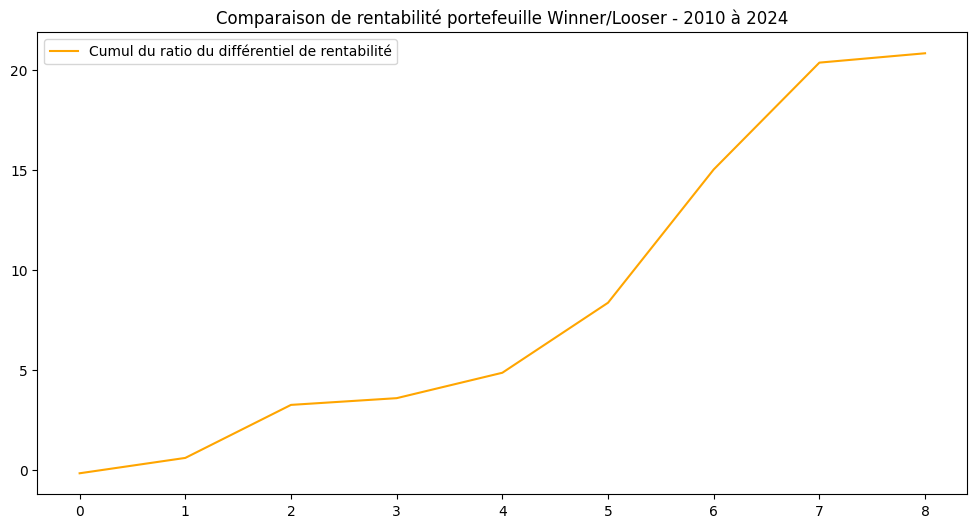

In [35]:
df_ret = pd.DataFrame()
renta_totale = []

for period in range(0,round((len(data)+1)/18),1):

    #Identification des portefeuilles Winner & Loser (composés de 10 titres) en analysant une période de 12 mois
    for column in data.columns:
        df_ret.loc[period,column] = data[column].head((period+1)*12).sum()
    
    top_10 = sorted(df_ret, reverse=True)[:10]
    worst_10 = sorted(df_ret)[:10]

    #Calcul de la rentabilité sur les 6 mois suivants

    #Calcul de la rentabilité des titres Winner
    renta_6_after_top = {}
    for element in top_10:
        renta_6_after_top[element] = data[element].head((period+1)*19).tail(6).sum().round(3)
    renta_top_10 = round(sum(renta_6_after_top.values()),3)

    #Calcul de la rentabilité des titres Looser
    renta_6_after_worst = {}
    for element in worst_10:
        renta_6_after_worst[element] = data[element].head(19).tail(6).sum().round(3)
    renta_worst_10 = round(sum(renta_6_after_worst.values()),3)

    #Calcul du différentiel de rentabilité
    renta_diff = (renta_top_10 - renta_worst_10) / renta_worst_10
    renta_totale.append(renta_diff)

renta_totale = pd.DataFrame(renta_totale)
renta_totale.columns = ["Renta Strat Winner/Loser"]

#Maintenant regardons la rentabilité cumulée au fil du temps
renta_totale_cumulée = renta_totale.cumsum()

#On plot
plt.figure(figsize=(12,6))
plt.plot(renta_totale_cumulée, label= "Cumul du ratio du différentiel de rentabilité", c="orange")
plt.title("Comparaison de rentabilité portefeuille Winner/Looser - 2010 à 2024")
plt.legend()
plt.plot()

On peut en conclure que le portfolio Winner a fait 20 fois plus de rentabilité que le portfolio Looser au cours de la période 2010 à 2024.